In [1]:
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import h5py
import sys
import seaborn as sns
%matplotlib inline

additionalFiles = '../MillionSongSubset/AdditionalFiles/'
data = '../MillionSongSubset/data/'

# SQL databases

In [2]:
!ls '../MillionSongSubset/AdditionalFiles/'

LICENSE                     subset_similarity.db
README                      subset_track_metadata.db
subset_artist_location.csv  subset_tracks_per_year.txt
subset_artist_location.txt  subset_unique_artists.txt
subset_artist_similarity.db subset_unique_mbtags.txt
subset_artist_term.db       subset_unique_terms.txt
subset_msd_summary_file.h5  subset_unique_tracks.txt


In [3]:
# Create engine: engine
engine = create_engine('sqlite:///../MillionSongSubset/AdditionalFiles/subset_track_metadata.db')

# Save the table names to a list: table_names
table_names = engine.table_names()
print(table_names)

with engine.connect() as con:
    
    # Perform query: rs
    rs = con.execute('SELECT * from songs')
    
    # Save results of the query to DataFrame: df
    df_tm = pd.DataFrame(rs.fetchall())
    df_tm.columns = rs.keys()


['songs']


In [4]:
df_tm.head()

,track_id,title,song_id,release,artist_id,artist_mbid,artist_name,duration,artist_familiarity,artist_hotttnesss,year
0,TRACCVZ128F4291A8A,Deep Sea Creature,SOVLGJY12A8C13FBED,Call of the Mastodon,ARMQHX71187B9890D3,bc5e2ad6-0a4a-4d90-b911-e9a7e6861727,Mastodon,280.21506,0.780462,0.574275,2001
1,TRACCMH128F428E4CD,No Quieras Marcharte,SOGDQZK12A8C13F37C,Adelante,AR2PT4M1187FB55B1A,d54ea4a6-0b9c-4e47-bed0-289ae9ff4037,Los Chichos,191.68608,0.561590,0.420570,1984
2,TRACCSW128F148C7C3,If I...,SODMVJR12A6D4F985D,Ill Na Na,ARDI88R1187B98DAB2,fd87374e-ffde-4d36-89a8-8a073f795666,Foxy Brown,222.92853,0.687687,0.406686,0
3,TRACCXJ128F428F0CF,Werther - Lyric Drama in four Acts/Act I/Alors...,SOIWBDR12A8C13A4AC,Massenet: Werther,ARUKJUP12086C14589,8a5f2736-bcde-4a2e-8d50-72631d66a7ef,Ramón Vargas;Vladimir Jurowski,278.38649,0.391741,0.291265,0
4,TRACCVS12903D014F8,Ad Te Clamamus Exsvles Mortva Liberi,SOHCCIA12AC907577F,Pentagrammaton,ARZEWUR1187FB53DC8,0be59867-0da4-4e45-9b64-728cdf25487c,Enthroned,89.15546,0.593416,0.395710,2010


(array([    9.,     5.,     3.,    29.,    97.,   195.,   288.,   629.,
         1227.,  2198.]),
 array([ 1926. ,  1934.4,  1942.8,  1951.2,  1959.6,  1968. ,  1976.4,
         1984.8,  1993.2,  2001.6,  2010. ]),
 <a list of 10 Patch objects>)

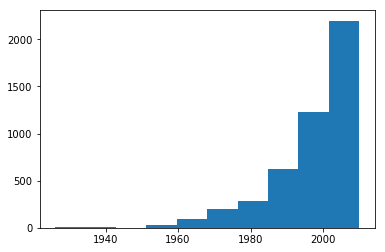

In [5]:
plt.hist(df_tm.year[df_tm.year>0])

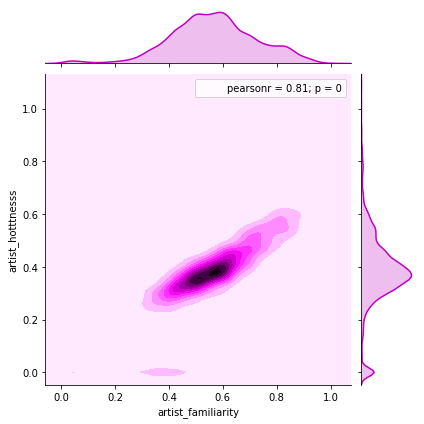

In [6]:
g = sns.jointplot(x=df_tm.artist_familiarity[df_tm.artist_familiarity>0], y=df_tm.artist_hotttnesss[df_tm.artist_familiarity>0], kind="kde", color="m")
# g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
# g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("artist_familiarity", "artist_hotttnesss");

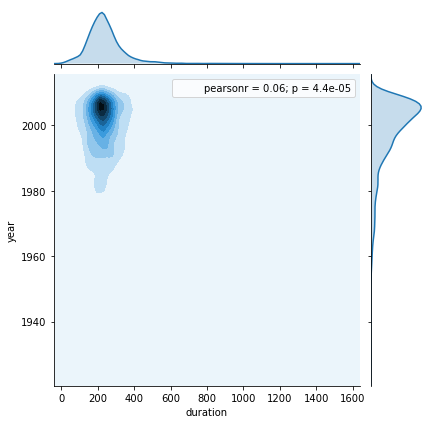

In [7]:
sns.jointplot(x = df_tm.duration[df_tm.year>0],y = df_tm.year[df_tm.year>0],kind = 'kde')

In [8]:
# Create engine: engine
engine = create_engine('sqlite:///../MillionSongSubset/AdditionalFiles/subset_artist_term.db')

# Save the table names to a list: table_names
table_names = engine.table_names()
print(table_names)

with engine.connect() as con:
    
    # Perform query: rs
    rs = con.execute('SELECT m.artist_id,m.mbtag,t.term FROM artist_mbtag m JOIN artist_term t ON m.artist_id=t.artist_id ')
    #mb tag = musicbrainz tag
    
    # Save results of the query to DataFrame: df
    df_at = pd.DataFrame(rs.fetchall())
    df_at.columns = rs.keys()

['artist_mbtag', 'artist_term', 'artists', 'mbtags', 'terms']


In [9]:
df_at.head()

,artist_id,mbtag,term
0,AR00A6H1187FB5402A,detroit,80s
1,AR00A6H1187FB5402A,detroit,alternative
2,AR00A6H1187FB5402A,detroit,american
3,AR00A6H1187FB5402A,detroit,american punk
4,AR00A6H1187FB5402A,detroit,american underground


In [10]:
df_at.term.describe()

count     110245
unique      1842
top         rock
freq        3170
Name: term, dtype: object

In [11]:
df_at.mbtag.describe()

count       110245
unique         726
top       american
freq          5638
Name: mbtag, dtype: object

In [12]:
# Create engine: engine
engine = create_engine('sqlite:///../MillionSongSubset/AdditionalFiles/subset_artist_similarity.db')

# Save the table names to a list: table_names
table_names = engine.table_names()
print(table_names)

with engine.connect() as con:
    
    # Perform query: rs
    rs = con.execute('SELECT * FROM similarity')
    #mb tag = musicbrainz tag
    
    # Save results of the query to DataFrame: df
    df_as = pd.DataFrame(rs.fetchall())
    df_as.columns = rs.keys()

['artists', 'similarity']


In [13]:
df_as.head()

,target,similar
0,AR009211187B989185,ARHINI31187B995C1D
1,AR009211187B989185,ARI0PUX1187FB3F215
2,AR009211187B989185,AR9RTS51187B996CC8
3,AR009211187B989185,ARS1DCR1187B9A4A56
4,AR009211187B989185,ARTPGR61187B98B0F6


In [14]:
with pd.HDFStore('../MillionSongSubset/AdditionalFiles/subset_msd_summary_file.h5') as store:
    print(store)
    analysis_summary = store.select('analysis/songs')
    metadata_summary = store.select('metadata/songs')
    musicbrainz_summary = store.select('musicbrainz/songs')                  

<class 'pandas.io.pytables.HDFStore'>
File path: ../MillionSongSubset/AdditionalFiles/subset_msd_summary_file.h5
/analysis/songs               frame_table [0.0.0] (typ->generic,nrows->10000,ncols->31,indexers->[index],dc->[analysis_sample_rate,audio_md5,danceability,duration,end_of_fade_in,energy,idx_bars_confidence,idx_bars_start,idx_beats_confidence,idx_beats_start,idx_sections_confidence,idx_sections_start,idx_segments_confidence,idx_segments_loudness_max,idx_segments_loudness_max_time,idx_segments_loudness_start,idx_segments_pitches,idx_segments_start,idx_segments_timbre,idx_tatums_confidence,idx_tatums_start,key,key_confidence,loudness,mode,mode_confidence,start_of_fade_out,tempo,time_signature,time_signature_confidence,track_id])
/metadata/songs               frame_table [0.0.0] (typ->generic,nrows->10000,ncols->20,indexers->[index],dc->[analyzer_version,artist_7digitalid,artist_familiarity,artist_hotttnesss,artist_id,artist_latitude,artist_location,artist_longitude,artist_mbid,a

In [15]:
analysis_summary.head()

,analysis_sample_rate,audio_md5,danceability,duration,end_of_fade_in,energy,idx_bars_confidence,idx_bars_start,idx_beats_confidence,idx_beats_start,...,key,key_confidence,loudness,mode,mode_confidence,start_of_fade_out,tempo,time_signature,time_signature_confidence,track_id
0,22050,a600d65cf157a306be60f26ecbf218f4,0.0,280.21506,0.238,0.0,0,0,0,0,...,5,0.555,-3.306,1,0.500,275.528,173.205,5,0.120,TRACCVZ128F4291A8A
1,22050,c64d75b0588e5ab552ee94548b50a4fa,0.0,191.68608,0.000,0.0,0,0,0,0,...,0,0.501,-10.764,1,0.710,184.128,150.955,4,0.600,TRACCMH128F428E4CD
2,22050,0cadd310865701bb93ced1cd78e8910a,0.0,222.92853,0.000,0.0,0,0,0,0,...,1,0.329,-9.035,1,0.407,216.300,93.056,4,1.000,TRACCSW128F148C7C3
3,22050,14be4fc1170152c445b3be7b8d18dfec,0.0,278.38649,0.496,0.0,0,0,0,0,...,7,0.313,-23.095,1,0.387,278.386,127.113,1,0.446,TRACCXJ128F428F0CF
4,22050,1def5d8298e8cb29a188a5a7c0e9429a,0.0,89.15546,4.847,0.0,0,0,0,0,...,2,0.000,-20.359,1,0.000,79.203,90.660,3,0.524,TRACCVS12903D014F8


In [49]:
metadata_summary.describe()

,artist_7digitalid,artist_familiarity,artist_hotttnesss,artist_latitude,artist_longitude,artist_playmeid,idx_artist_terms,idx_similar_artists,release_7digitalid,song_hotttnesss,track_7digitalid
count,10000.000000,9996.000000,10000.000000,3742.000000,3742.000000,10000.000000,10000.0,10000.0,10000.000000,5648.000000,1.000000e+04
mean,109541.695500,0.565456,0.385552,37.157357,-63.933358,25547.117000,0.0,0.0,371033.508000,0.342822,4.122549e+06
std,142079.791611,0.160161,0.143647,15.598494,50.508223,44001.390646,0.0,0.0,236764.904751,0.247220,2.628539e+06
min,-1.000000,0.000000,0.000000,-41.280540,-162.436500,-1.000000,0.0,0.0,63.000000,0.000000,8.450000e+02
25%,10435.000000,0.467611,0.325266,33.748310,-93.291560,-1.000000,0.0,0.0,172858.000000,0.000000,1.886266e+06
50%,40247.000000,0.563666,0.380742,38.997920,-80.237420,2190.000000,0.0,0.0,333103.000000,0.360371,3.762410e+06
75%,170417.000000,0.668020,0.453858,43.648560,-9.401020,33312.500000,0.0,0.0,573532.500000,0.537504,6.358996e+06
max,809205.000000,1.000000,1.082503,69.651020,174.767140,242965.000000,0.0,0.0,823599.000000,1.000000,9.090443e+06


In [50]:
metadata_plusGenre = pd.merge(metadata_summary,df_at.drop_duplicates('artist_id'), how='left', on=['artist_id'])
# metadata_plusGenre = metadata_plusGenre.drop_duplicates(subset=['song_id'])
metadata_plusGenre.describe()

,artist_7digitalid,artist_familiarity,artist_hotttnesss,artist_latitude,artist_longitude,artist_playmeid,idx_artist_terms,idx_similar_artists,release_7digitalid,song_hotttnesss,track_7digitalid
count,10000.000000,9996.000000,10000.000000,3742.000000,3742.000000,10000.000000,10000.0,10000.0,10000.000000,5648.000000,1.000000e+04
mean,109541.695500,0.565456,0.385552,37.157357,-63.933358,25547.117000,0.0,0.0,371033.508000,0.342822,4.122549e+06
std,142079.791611,0.160161,0.143647,15.598494,50.508223,44001.390646,0.0,0.0,236764.904751,0.247220,2.628539e+06
min,-1.000000,0.000000,0.000000,-41.280540,-162.436500,-1.000000,0.0,0.0,63.000000,0.000000,8.450000e+02
25%,10435.000000,0.467611,0.325266,33.748310,-93.291560,-1.000000,0.0,0.0,172858.000000,0.000000,1.886266e+06
50%,40247.000000,0.563666,0.380742,38.997920,-80.237420,2190.000000,0.0,0.0,333103.000000,0.360371,3.762410e+06
75%,170417.000000,0.668020,0.453858,43.648560,-9.401020,33312.500000,0.0,0.0,573532.500000,0.537504,6.358996e+06
max,809205.000000,1.000000,1.082503,69.651020,174.767140,242965.000000,0.0,0.0,823599.000000,1.000000,9.090443e+06


In [51]:
musicbrainz_summary.describe()

,idx_artist_mbtags,year
count,10000.0,10000.000000
mean,0.0,934.704600
std,0.0,996.650657
min,0.0,0.000000
25%,0.0,0.000000
50%,0.0,0.000000
75%,0.0,2000.000000
max,0.0,2010.000000


In [52]:
analysis_summary.to_csv('Track_analysis.csv')
metadata_plusGenre.to_csv('Track_metadata.csv')
musicbrainz_summary.to_csv('Track_musicbrainz.csv')
analysis_summary.to_excel('Track_analysis.xlsx')

# Data

This process replicates the summaries

In [ ]:
import string,os
for j in ['A','B']:
    for k in string.ascii_uppercase:
        for l in string.ascii_uppercase:
            try:
                loc = '../MillionSongSubset/data/'+j+'/'+k+'/'+l+'/'
                fn_list = os.listdir(loc)
                for fn in fn_list:
                    try:
                        with pd.HDFStore(loc+fn) as store:
                            if fn == 'TRAAAAW128F429D538.h5':
                                analysis = store.select('analysis/songs')
                                metadata = store.select('metadata/songs')
                                musicbrainz = store.select('musicbrainz/songs')
                            else:
                                a = store.select('analysis/songs')
                                me = store.select('metadata/songs')
                                mu = store.select('musicbrainz/songs')
                                analysis = pd.concat([analysis,a],ignore_index=True)
                                metadata = pd.concat([metadata,me],ignore_index=True)
                                musicbrainz = pd.concat([musicbrainz,mu],ignore_index=True)
                    except:
                        with pd.HDFStore(loc+fn) as store:
                            print(store)
            except:
                pass

In [ ]:
analysis.describe()

In [ ]:
metadata.describe()

In [ ]:
musicbrainz.describe()

In [ ]:
plt.figure(figsize=(6,6))
corr = analysis.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True)